In [1]:
# import pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# delete first 437 rows and the last row in the file, no column names
df = pd.read_csv('grady_data.csv', skiprows=437, skipfooter=1, engine='python', header=None)

In [3]:
# divide df into three subframes based in the value if the column 1, start_df with value s in coulmn 1, attempts_df with value a in column 1, final_df with value f in column 1
start_df = df[df[1] == 's']
attempts_df = df[df[1] == 'a']
final_df = df[df[1] == 'f']

In [4]:
# rename columns in start_df, 0 is "game_id", 1 is "status", 2 is "timestamp", 3 is "player_type", 4 is "game_type", 5 is "tolerance",  6 is "a", 7 is "b", 8 is "c", 9 is "min"
start_df.columns = ["game_id", "status", "timestamp", "player_type", "game_type", "tolerance", "a", "b", "c", "min"]
# drop rows where game_id is in [3657dd90, b02965, 1144fc11, a637af8, 1cdbfabd] (time outliers)
start_df = start_df[~start_df['game_id'].isin(['3657dd90', 'b02965', '1144fc11', 'a637af8', '1cdbfabd'])]

In [5]:
# How many games were started (Absolute counts)? Split into:
# game type
# player type
# by game level (maybe save it for later)

# count the number of games started
games_started = start_df['game_id'].count()
print("Number of games started: ", games_started)

# using start_df, count the number of games started by game type
game_type_count = start_df['game_type'].value_counts()
print("Number of games started by game type: ", game_type_count)

# using start_df, count the number of games started by player type
player_type_count = start_df['player_type'].value_counts()
print("Number of games started by player type: ", player_type_count)

# using start_df, count the number of games started by game level
game_level_count = start_df['tolerance'].value_counts()
print("Number of games started by game level: ", game_level_count)

Number of games started:  494
Number of games started by game type:  game_type
analytical    248
visual        246
Name: count, dtype: int64
Number of games started by player type:  player_type
nerd     180
bored    116
bird     108
both      90
Name: count, dtype: int64
Number of games started by game level:  tolerance
1.0    470
3.0     13
2.0     11
Name: count, dtype: int64


In [6]:
# rename columns in attmepts_df, 0 is "game_id", 1 is "status", 2 is "timestamp", 3 is "guess_number", 4 is "x", 5 is "y' and remove 4 last columns
attempts_df = attempts_df.drop(attempts_df.columns[[6, 7, 8, 9]], axis=1)
attempts_df.columns = ["game_id", "status", "timestamp", "guess_number", "x", "y"]

# drop rows where game_id is in [3657dd90, b02965, 1144fc11, a637af8, 1cdbfabd] (time outliers)
attempts_df = attempts_df[~attempts_df['game_id'].isin(['3657dd90', 'b02965', '1144fc11', 'a637af8', '1cdbfabd'])]

In [7]:
# in attempts_df group records by game_id
grouped = attempts_df.groupby('game_id')

# convert timestamp to int
attempts_df['timestamp'] = attempts_df['timestamp'].astype(int)

# within each group calculate difference between timestamps
attempts_df['timestamp_diff'] = grouped['timestamp'].diff()

#replace NaN values with 0
attempts_df['timestamp_diff'] = attempts_df['timestamp_diff'].fillna(0)

# convert timestamp_diff from millisocnds to seconds
attempts_df['timestamp_diff'] = attempts_df['timestamp_diff'] / 1000

# compute min, max, mean, median,  of the time between guesses
min_time_between_guesses = abs(attempts_df['timestamp_diff'].min())
max_time_between_guesses = attempts_df['timestamp_diff'].max()
mean_time_between_guesses = attempts_df['timestamp_diff'].mean()
median_time_between_guesses = attempts_df['timestamp_diff'].median()

# #print out the results in one string (add graphs??) (throw out outliers)
print("\nMin time between guesses: ", min_time_between_guesses, 'seconds',  "\nMax time between guesses: ", max_time_between_guesses, 'seconds', "\nMean time between guesses: ", mean_time_between_guesses, 'seconds', "\nMedian time between guesses: ", median_time_between_guesses, 'seconds')


Min time between guesses:  1.139 seconds 
Max time between guesses:  368.124 seconds 
Mean time between guesses:  7.166780755176614 seconds 
Median time between guesses:  4.061 seconds


In [8]:
# in finish_df remove 5 last columns and rename remainng columns 1-5 as "game_id","f","timestamp","num_guesses","outcome"
finish_df = df[df[1] == 'f']
finish_df = finish_df.drop(finish_df.columns[[5, 6, 7, 8, 9]], axis=1)
finish_df.columns = ["game_id", "status", "timestamp", "num_guesses", "outcome"]
# drop rows where game_id is in [3657dd90, b02965, 1144fc11, a637af8, 1cdbfabd] (time outliers)
finish_df = finish_df[~finish_df['game_id'].isin(['3657dd90', 'b02965', '1144fc11', 'a637af8', '1cdbfabd'])]

In [9]:
# How many games were finished (Absolute counts)? Split into:
# abandoned
# won
# lost

# using start_df and finish_df count how many start game_id not in the finish game_id
abandoned_games = start_df[~start_df['game_id'].isin(finish_df['game_id'])]
abandoned_games = abandoned_games['game_id'].count()
print("Number of abandoned games: ", abandoned_games)

# using finish_df cout the total number of games finished
total_games_finished = finish_df['outcome'].count()
print("Total number of games finished: ", total_games_finished)

# using finish_df, count the number of games finished by outcome
outcome_count = finish_df['outcome'].value_counts()
print("Number of games finished by outcome: ", outcome_count)

Number of abandoned games:  266
Total number of games finished:  228
Number of games finished by outcome:  outcome
Hooray!    199
Alas!       29
Name: count, dtype: int64


In [10]:
# using start_df and finish_df, compute average time to solve the game
# merge start_df and finish_df on game_id
start_finish_df = pd.merge(start_df, finish_df, on='game_id')

# using the merged dataframe, compute the time to solve the game, 
# first cast timestamp_start and timestamp_finish to int, then compute the difference
start_finish_df['timestamp_start'] = start_finish_df['timestamp_x'].astype(int) 
start_finish_df['timestamp_finish'] = start_finish_df['timestamp_y'].astype(int)
start_finish_df['time_to_solve'] = start_finish_df['timestamp_finish'] - start_finish_df['timestamp_start']
# now time_to_solve in milliseconds, convert it to minutes
start_finish_df['time_to_solve'] = start_finish_df['time_to_solve'] / 60000
start_finish_df

,game_id,status_x,timestamp_x,player_type,game_type,tolerance,a,b,c,min,status_y,timestamp_y,num_guesses,outcome,timestamp_start,timestamp_finish,time_to_solve
0,608611d,s,1710907012504,both,visual,1.0,2.977267,5.348519,9.878772,-0.898226,f,1710907175656,10,Hooray!,1710907012504,1710907175656,2.719200
1,25ed8225,s,1710945492578,bird,analytical,1.0,4.956429,5.733416,8.261064,-0.578382,f,1710945755900,14,Hooray!,1710945492578,1710945755900,4.388700
2,35693377,s,1710945787097,nerd,visual,1.0,1.347889,-2.620862,-2.291495,0.972210,f,1710945885965,4,Hooray!,1710945787097,1710945885965,1.647800
3,1618a060,s,1711064541815,nerd,visual,1.0,3.837024,-3.776831,-7.683637,0.492156,f,1711064549007,4,Hooray!,1711064541815,1711064549007,0.119867
4,17022b9,s,1711934437700,bored,analytical,1.0,2.064447,-9.290401,-1.434836,2.250095,f,1711934560807,15,Hooray!,1711934437700,1711934560807,2.051783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,16f8e8a0,s,1713580164561,both,analytical,1.0,6.772600,-4.114279,-9.225919,0.303744,f,1713580250544,16,Hooray!,1713580164561,1713580250544,1.433050
224,194f1cc5,s,1713580244048,both,visual,1.0,6.046963,7.567866,-3.859708,-0.625758,f,1713580306204,8,Hooray!,1713580244048,1713580306204,1.035933
225,6e029bc,s,1713580266815,both,analytical,1.0,0.921683,-1.485178,2.768807,0.805688,f,1713580355906,13,Hooray!,1713580266815,1713580355906,1.484850
226,5e4a5e5,s,1713580319197,both,analytical,1.0,5.087848,-9.833364,-9.343456,0.966358,f,1713580322193,1,Hooray!,1713580319197,1713580322193,0.049933


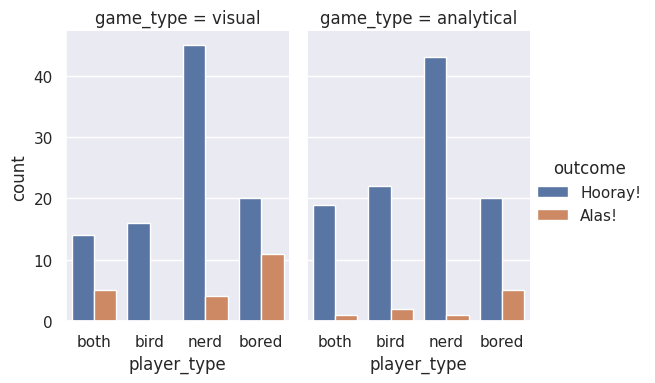

In [11]:
# create a new separate dataframe s_f_df with player_type, game_type, tolerance, outcome, num_guesses, time_to_solve
s_f_df = start_finish_df[['game_id', 'player_type', 'game_type', 'tolerance', 'outcome', 'num_guesses', 'time_to_solve']]

# create a plot that shows relationship between nerd player type, game type, and outcomes
sns.set(style="darkgrid")
sns.catplot(x="player_type", hue="outcome", col="game_type", data=s_f_df, kind="count", height=4, aspect=.7)
plt.show()


# add "abandoned_games" pie charts?

In [12]:
# Average, min, max, and median for:
# time per game (start to finish)
# number of guesses per game

# using start_finish_df, compute min max and median for time to solve the game
min_time_to_solve = start_finish_df['time_to_solve'].min()
max_time_to_solve = start_finish_df['time_to_solve'].max()
median_time_to_solve = start_finish_df['time_to_solve'].median()
average_time_to_solve = start_finish_df['time_to_solve'].mean()
print('\n',"Min time to solve the game (minutes): ", min_time_to_solve, '\n', "Max time to solve the game (minutes): ", max_time_to_solve, '\n', "Median time to solve the game (minutes): ", median_time_to_solve, '\n', "Average time to solve the game (minutes): ", average_time_to_solve)

# using start_finish_df, compute min max and median for number of guesses per game
start_finish_df['num_guesses'] = pd.to_numeric(start_finish_df['num_guesses'], errors='coerce')
min_num_guesses = start_finish_df['num_guesses'].min()
max_num_guesses = start_finish_df['num_guesses'].max()
median_num_guesses = start_finish_df['num_guesses'].median()
average_num_guesses = start_finish_df['num_guesses'].mean()
print('\n',"Min number of guesses per game: ", min_num_guesses, '\n', "Max number of guesses per game: ", max_num_guesses, '\n', "Median number of guesses per game: ", median_num_guesses, '\n', "Average number of guesses per game: ", average_num_guesses)


 Min time to solve the game (minutes):  0.03315 
 Max time to solve the game (minutes):  9.62995 
 Median time to solve the game (minutes):  0.9422250000000001 
 Average time to solve the game (minutes):  1.2817543128654971

 Min number of guesses per game:  1 
 Max number of guesses per game:  48 
 Median number of guesses per game:  8.0 
 Average number of guesses per game:  8.956140350877194


In [13]:
# from start_finish_df, compute the average time to solve the game, using rows where outcome is "Hooray!"
start_finish_wins_df = start_finish_df[start_finish_df['outcome'] == 'Hooray!']
avg_time_to_solve_win = start_finish_wins_df['time_to_solve'].mean()

print("Average time to win the game is", avg_time_to_solve_win, "minutes")

start_finish_alas_df = start_finish_df[start_finish_df['outcome'] == 'Alas!']
avg_time_to_solve_alas = start_finish_alas_df['time_to_solve'].mean()

print("Average time to give up on game is", avg_time_to_solve_alas, "minutes")

Average time to win the game is 1.2569430485762143 minutes
Average time to give up on game is 1.4520109195402302 minutes


In [14]:
# in start_finish_df, compute the average number of guesses to solve the game where outcome is "Hooray!", cast num_guesses to int
avg_num_guesses_win = start_finish_wins_df['num_guesses'].mean()

print("Average number of guesses to solve the game when outcome is 'Hooray!': ", avg_num_guesses_win)

# do the same for outcome "Alas!"
avg_num_guesses_alas = start_finish_alas_df['num_guesses'].mean()

print("Average number of guesses to solve the game when outcome is 'Alas!': ", avg_num_guesses_alas)

Average number of guesses to solve the game when outcome is 'Hooray!':  9.06532663316583
Average number of guesses to solve the game when outcome is 'Alas!':  8.206896551724139


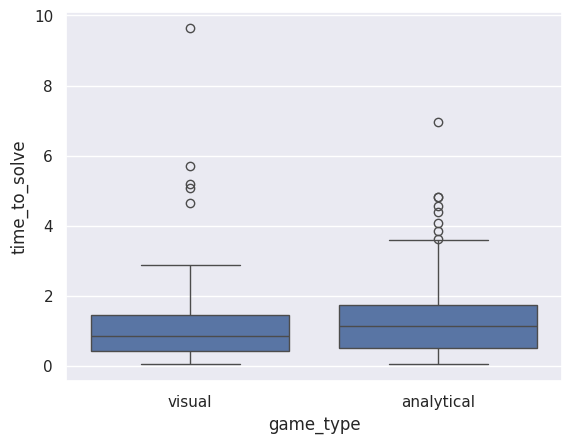

In [15]:
# using start_finish_df, display relationship between time to solve the game and game type
sns.boxplot(x='game_type', y='time_to_solve', data=start_finish_df)
plt.show()

# the plot suggests that games solved using visual methods typically required less time 
# and had less variability in the time to solve than those solved using analytical methods 
# however, both methods have cases where the time to solve was much longer than the average, as indicated by the outliers

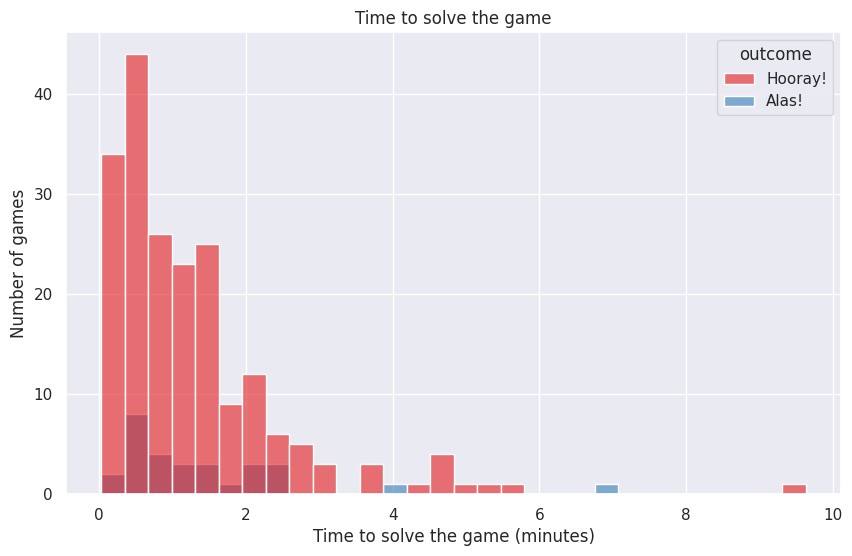

In [16]:
# using start_finish_df plot a histogram of the time to solve the game for both outcomes
plt.figure(figsize=(10, 6))
sns.histplot(data=start_finish_df, x='time_to_solve', hue='outcome', bins=30, alpha=0.6, palette='Set1')
plt.title('Time to solve the game')
plt.xlabel('Time to solve the game (minutes)')
plt.ylabel('Number of games')
plt.show()

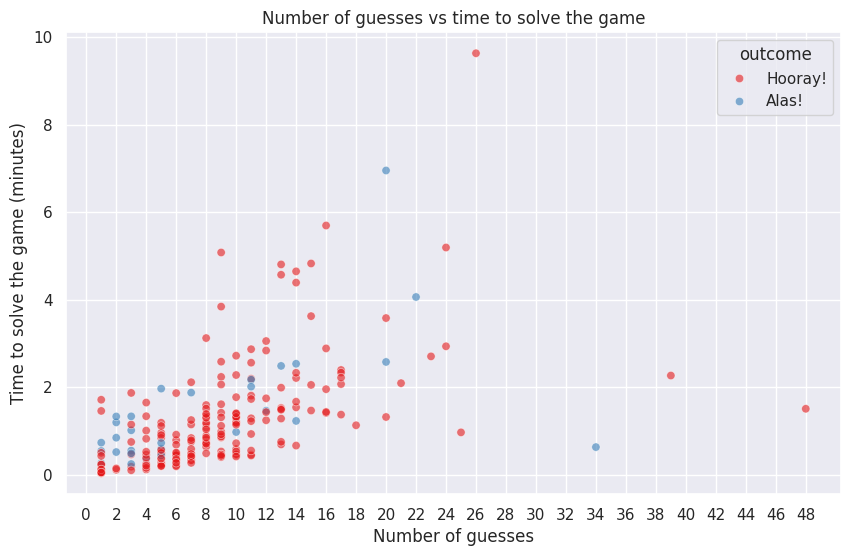

In [22]:
# plot the realtionship between number of guesses and time to solve the game, diffenret colors for different outcomes, cast num_guesses to int, display only round numbers
start_finish_df['num_guesses'] = start_finish_df['num_guesses'].astype(int)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=start_finish_df, x='num_guesses', y='time_to_solve', hue='outcome', alpha=0.6, palette='Set1')
plt.title('Number of guesses vs time to solve the game')
plt.xlabel('Number of guesses')
plt.ylabel('Time to solve the game (minutes)')
# gte maximum number of guesses from start_finish_df
max_guesses = start_finish_df['num_guesses'].max()
plt.xticks(range(0, max_guesses+1, 2))
plt.show()

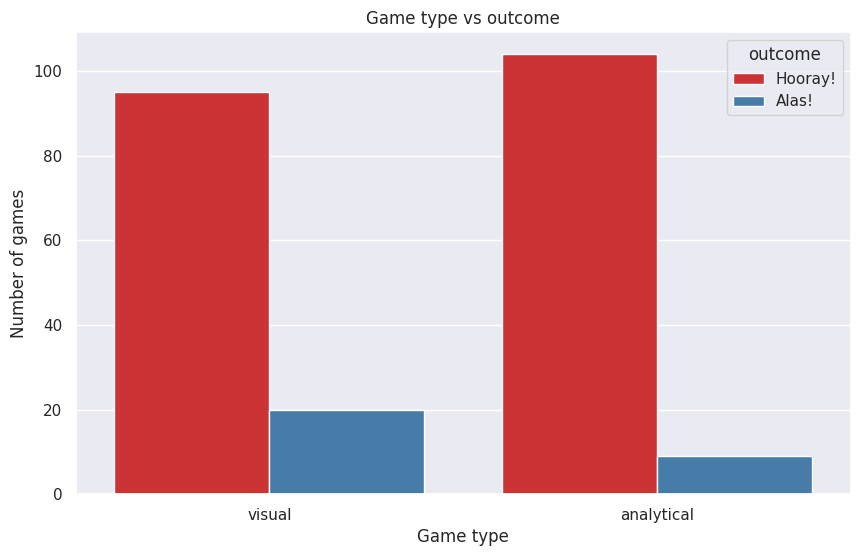

In [18]:
# plot realtionship between game_type and outcomes
plt.figure(figsize=(10, 6))
sns.countplot(data=start_finish_df, x='game_type', hue='outcome', palette='Set1')
plt.title('Game type vs outcome')
plt.xlabel('Game type')
plt.ylabel('Number of games')
plt.show()

Text(0.5, 1.0, 'Player type vs outcome')

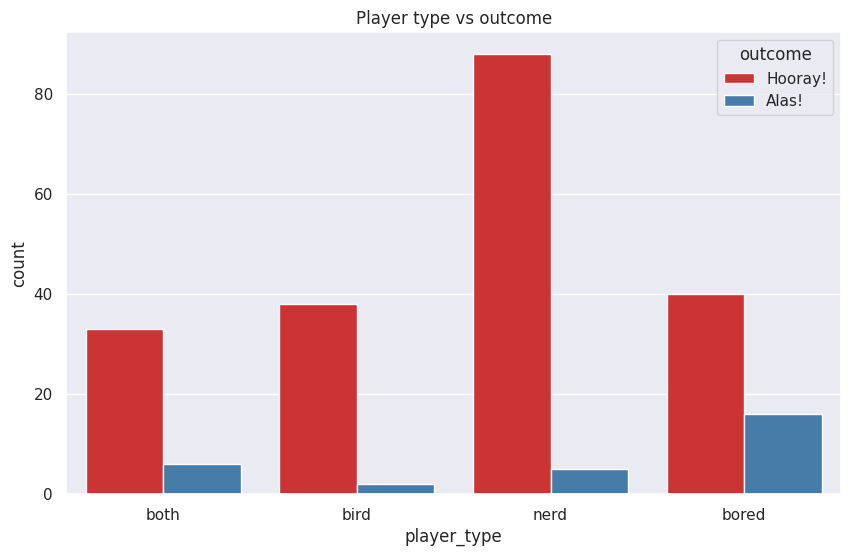

In [19]:
# plot relationship between player_type and outcomes
plt.figure(figsize=(10, 6))
sns.countplot(data=start_finish_df, x='player_type', hue='outcome', palette='Set1')
plt.title('Player type vs outcome')

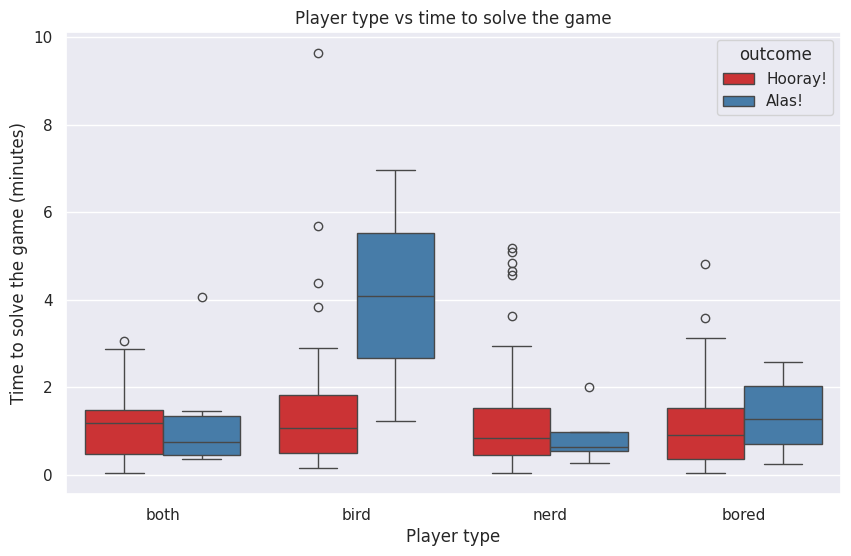

In [20]:
# plot relationship between player type and time to solve the game, hue is outcome
plt.figure(figsize=(10, 6))
sns.boxplot(data=start_finish_df, x='player_type', y='time_to_solve', hue='outcome', palette='Set1')
plt.title('Player type vs time to solve the game')
plt.xlabel('Player type')
plt.ylabel('Time to solve the game (minutes)')
plt.show()

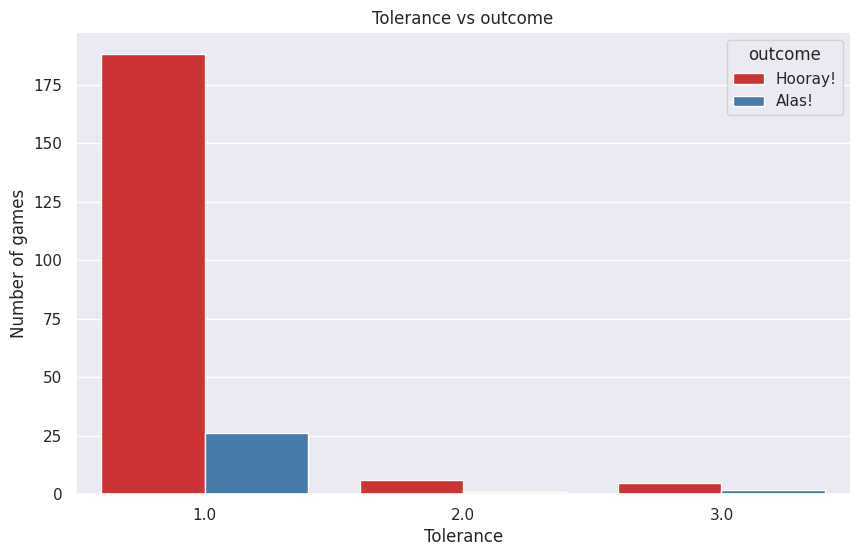

In [21]:
# plot relationship between tolerance and outcomes
plt.figure(figsize=(10, 6))
sns.countplot(data=start_finish_df, x='tolerance', hue='outcome', palette='Set1')
plt.title('Tolerance vs outcome')
plt.xlabel('Tolerance')
plt.ylabel('Number of games')
plt.show()